### Importing the Depencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data collection

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data analysis and Visualization

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


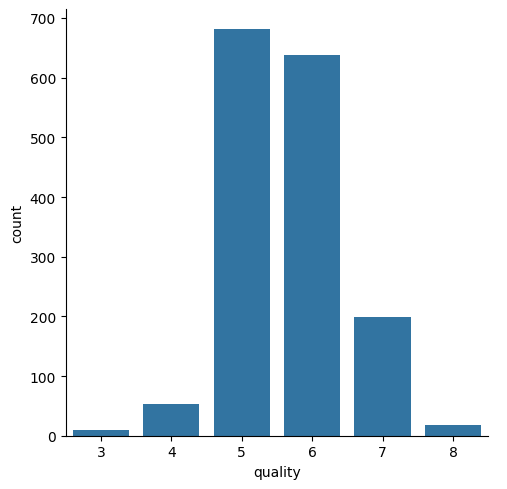

In [8]:
# numbers of values in each quality
sns.catplot(x= 'quality',data = df,kind= 'count')

<Axes: xlabel='quality', ylabel='fixed acidity'>

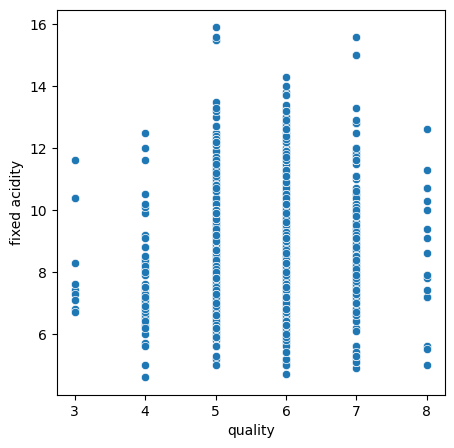

In [23]:
# fixed acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x= 'quality',y = 'fixed acidity',data=df)

# B/W 7-13

<Axes: xlabel='quality', ylabel='volatile acidity'>

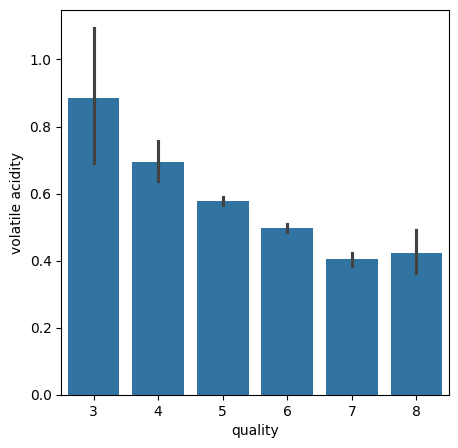

In [11]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality',y = 'volatile acidity',data=df)

# quality of wine is inversely proposal to quality

<Axes: xlabel='quality', ylabel='citric acid'>

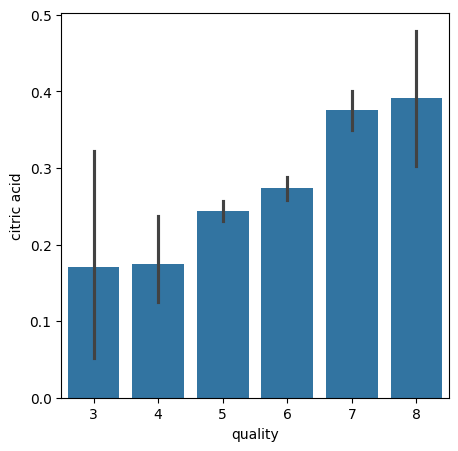

In [12]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality',y = 'citric acid',data=df)


# quality of wine is  proposal to quality

<Axes: xlabel='quality', ylabel='residual sugar'>

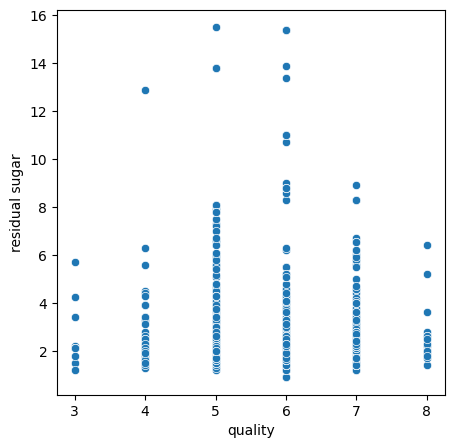

In [24]:
# residual sugar vs quality
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x= 'quality',y = 'residual sugar',data=df)

# less than 8

<Axes: xlabel='quality', ylabel='chlorides'>

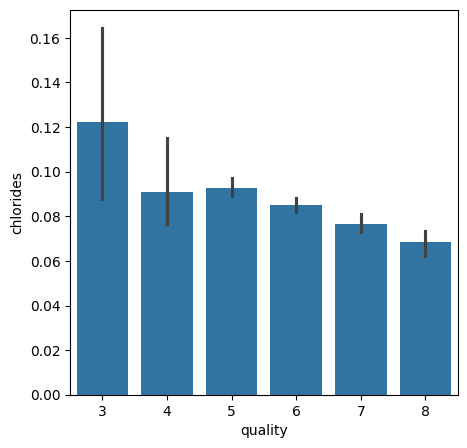

In [15]:
# chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality',y = 'chlorides',data=df)

# quality of wine is inversely proposal to quality

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

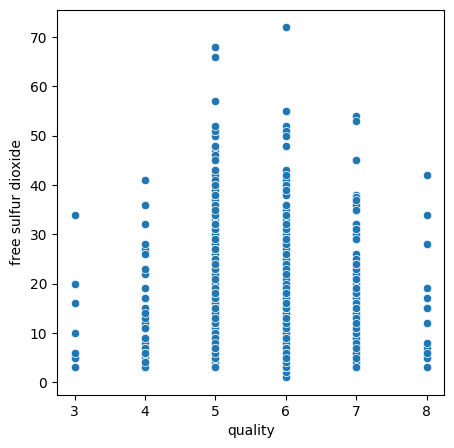

In [17]:
# free sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x= 'quality',y = 'free sulfur dioxide',data=df)

# sould be less than 50

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

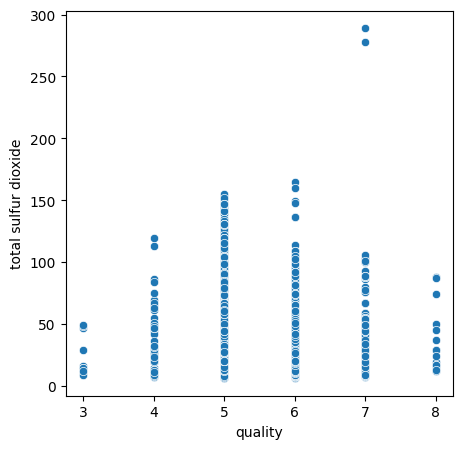

In [19]:
# total sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x= 'quality',y = 'total sulfur dioxide',data=df)


# less than 125 round off

<Axes: xlabel='quality', ylabel='density'>

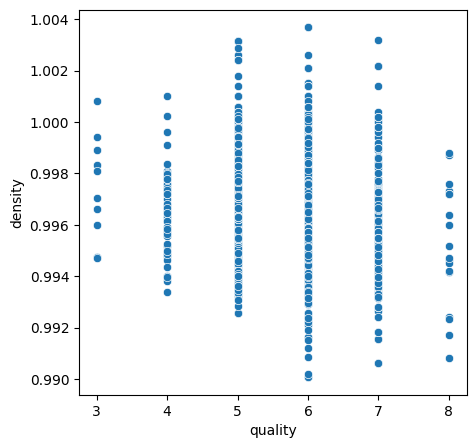

In [22]:
# density vs quality
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x= 'quality',y = 'density',data=df)

# B/W 0.994-0.998

<Axes: xlabel='quality', ylabel='alcohol'>

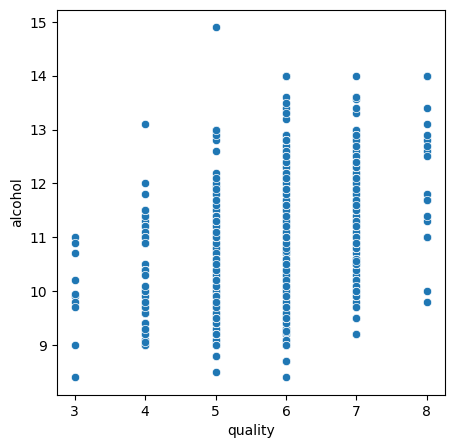

In [28]:
# alcohol vs quality
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x= 'quality',y = 'alcohol',data=df)

# no usefull inside

### Correlation

#### 1.negative correlation
#### 2.positive correlation

In [29]:
correlation = df.corr()

<Axes: >

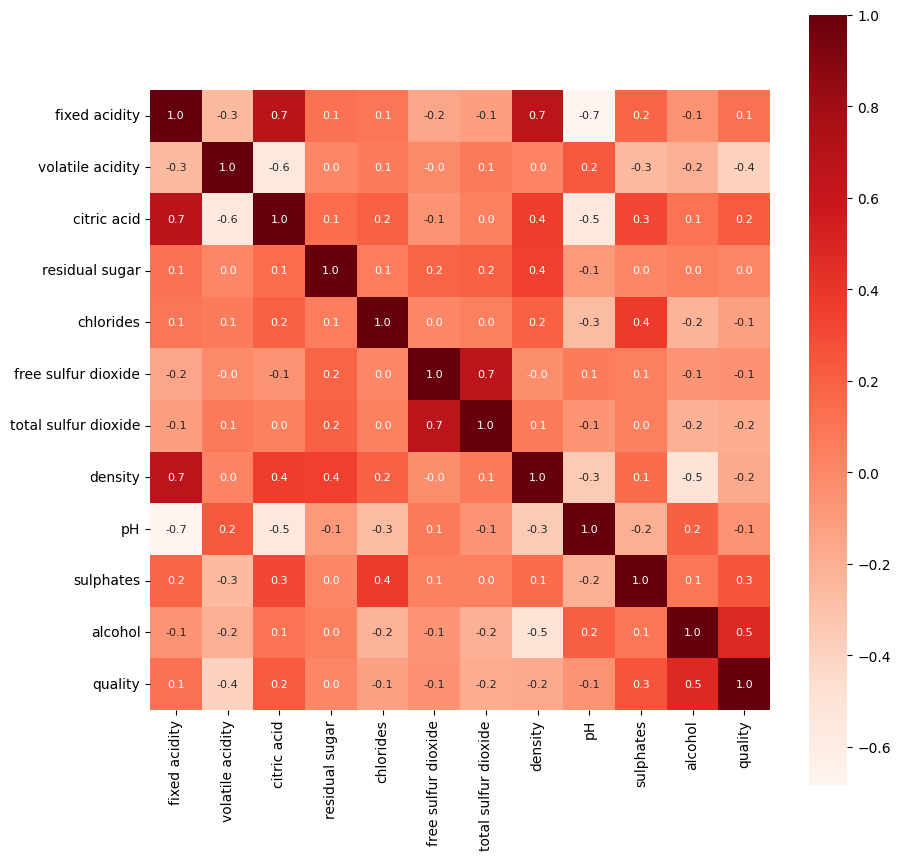

In [33]:
# constructing a heatmap to understand the correlation B/W the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

### Data Prepossessing

In [35]:
# seprating data label

x = df.drop('quality',axis=1)


In [37]:
# label binarization
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

### train and test data

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

### Model Training

#### Random Forest Classifier

In [40]:
model = RandomForestClassifier()

In [41]:
model.fit(x_train,y_train)

RandomForestClassifier()

### Model Evaluation

In [42]:
# accuracy score for training data
x_train_predict = model.predict(x_train)
accuracy_score(x_train_predict,y_train)

1.0

In [43]:
# accuracy score for testing data
x_test_predict = model.predict(x_test)
accuracy_score(x_test_predict,y_test)

0.925